#🌎📊 Análisis de Entradas de Extranjeros a Colombia 🇨🇴

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ruta_archivo = '/content/Entradas_de_extranjeros_a_Colombia_20250221.csv'

df = pd.read_csv(ruta_archivo)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135040 entries, 0 to 135039
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Año                 135040 non-null  int64  
 1   Mes                 135040 non-null  object 
 2   Nacionalidad        135040 non-null  object 
 3   Codigo Iso 3166     135040 non-null  object 
 4   Femenino            135040 non-null  object 
 5   Masculino           135040 non-null  object 
 6   Indefinido          0 non-null       float64
 7   Total               135040 non-null  object 
 8   Latitud - Longitud  135040 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.3+ MB


In [5]:
df.head(10)

Año    Mes             Nacionalidad Codigo Iso 3166 Femenino Masculino  \
0  2012  Enero  Islas Alboran y Perejil          99,999        1         0   
1  2012  Enero                  Albania               8        1         2   
2  2012  Enero                 Alemania             276       11        16   
3  2012  Enero                 Alemania             276        1         1   
4  2012  Enero                 Alemania             276       63       102   
5  2012  Enero                 Alemania             276       22        23   
6  2012  Enero                 Alemania             276       27        48   
7  2012  Enero                 Alemania             276        7         4   
8  2012  Enero                 Alemania             276        1         1   
9  2012  Enero                 Alemania             276        8        21   

   Indefinido Total      Latitud - Longitud  
0         NaN     1   (4.697144,-74.140516)  
1         NaN     3   (4.697144,-74.140516)  
2         NaN    27  (-4.197703,-69.941278)  
3         NaN     2    (0.25129,-76.875963)  
4         NaN   165   (0.814836,-77.662532)  
5         NaN    45  (10.408582,-75.538003)  
6         NaN    75  (10.445761,-75.516429)  
7         NaN    11  (10.886611,-74.776708)  
8         NaN     2  (11.247723,-74.213989)  
9         NaN    29  (11.360009,-72.129330)

# 📊 Resumen de los datos:

✅ **Cantidad de registros:** 135,040  

✅ **Columnas disponibles:**
- **Año** (*int*) → Año del registro  
- **Mes** (*object*) → Mes del registro  
- **Nacionalidad** (*object*) → País de origen del visitante  
- **Codigo Iso 3166** (*object*) → Código ISO del país  
- **Femenino** (*object*) → Número de mujeres ingresadas  
- **Masculino** (*object*) → Número de hombres ingresados  
- **Indefinido** (*float64*) → Siempre NaN (sin datos)  
- **Total** (*object*) → Total de ingresos  
- **Latitud - Longitud** (*object*) → Ubicación en coordenadas  

## 🚨 Observaciones:
- La columna **Indefinido** está completamente vacía, la podemos descartar.  
- **Femenino, Masculino y Total** están en formato de texto, debemos convertirlas a números.  
- **Latitud - Longitud** tiene coordenadas que podríamos usar en un mapa.  


In [7]:
# Eliminar la columna vacía "Indefinido"
df = df.drop(columns=["Indefinido"])

# Convertir columnas numéricas a tipo int
df["Femenino"] = pd.to_numeric(df["Femenino"], errors="coerce").fillna(0).astype(int)
df["Masculino"] = pd.to_numeric(df["Masculino"], errors="coerce").fillna(0).astype(int)
df["Total"] = pd.to_numeric(df["Total"], errors="coerce").fillna(0).astype(int)

# Verificamos cambios
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135040 entries, 0 to 135039
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Año                 135040 non-null  int64 
 1   Mes                 135040 non-null  object
 2   Nacionalidad        135040 non-null  object
 3   Codigo Iso 3166     135040 non-null  object
 4   Femenino            135040 non-null  int64 
 5   Masculino           135040 non-null  int64 
 6   Total               135040 non-null  int64 
 7   Latitud - Longitud  135040 non-null  object
dtypes: int64(4), object(4)
memory usage: 8.2+ MB


(None,
     Año    Mes             Nacionalidad Codigo Iso 3166  Femenino  Masculino  \
 0  2012  Enero  Islas Alboran y Perejil          99,999         1          0   
 1  2012  Enero                  Albania               8         1          2   
 2  2012  Enero                 Alemania             276        11         16   
 3  2012  Enero                 Alemania             276         1          1   
 4  2012  Enero                 Alemania             276        63        102   
 
    Total      Latitud - Longitud  
 0      1   (4.697144,-74.140516)  
 1      3   (4.697144,-74.140516)  
 2     27  (-4.197703,-69.941278)  
 3      2    (0.25129,-76.875963)  
 4    165   (0.814836,-77.662532)  )

## ✅ Limpieza completada:

- Se eliminó la columna vacía **"Indefinido"**.
- Se corrigieron los datos numéricos en **"Femenino"**, **"Masculino"** y **"Total"**.
- El dataset está listo para análisis. 🚀


In [8]:
# Últimos 5 años disponibles
ultimo_anio = df["Año"].max()
df_ultimos5 = df[df["Año"] >= (ultimo_anio - 4)]

# Top 10 países con más entradas en total
top_paises = df_ultimos5.groupby("Nacionalidad")["Total"].sum().nlargest(10)

# Distribución por género en los últimos 5 años
distribucion_genero = df_ultimos5[["Femenino", "Masculino"]].sum()

# Resultados
ultimo_anio, top_paises, distribucion_genero


(2023,
 Nacionalidad
 Venezuela                    140533
 Estados Unidos de América     84934
 Panamá                        79770
 Brasil                        78573
 Argentina                     72560
 Perú                          72196
 Chile                         65754
 Ecuador                       63940
 España                        61582
 Francia                       60868
 Name: Total, dtype: int64,
 Femenino     1266754
 Masculino    1625307
 dtype: int64)

# 📊 Filtros iniciales:

✅ **Último año en los datos:** **2023**  

✅ **Top 10 países con más entradas en los últimos 5 años:**  

🇻🇪 **Venezuela** → 140,533  
🇺🇸 **Estados Unidos** → 84,934  
🇵🇦 **Panamá** → 79,770  
🇧🇷 **Brasil** → 78,573  
🇦🇷 **Argentina** → 72,560  
🇵🇪 **Perú** → 72,196  
🇨🇱 **Chile** → 65,754  
🇪🇨 **Ecuador** → 63,940  
🇪🇸 **España** → 61,582  
🇫🇷 **Francia** → 60,868  

✅ **Distribución por género en los últimos 5 años:**  

👩 **Mujeres:** 1,266,754  
👨 **Hombres:** 1,625,307  


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


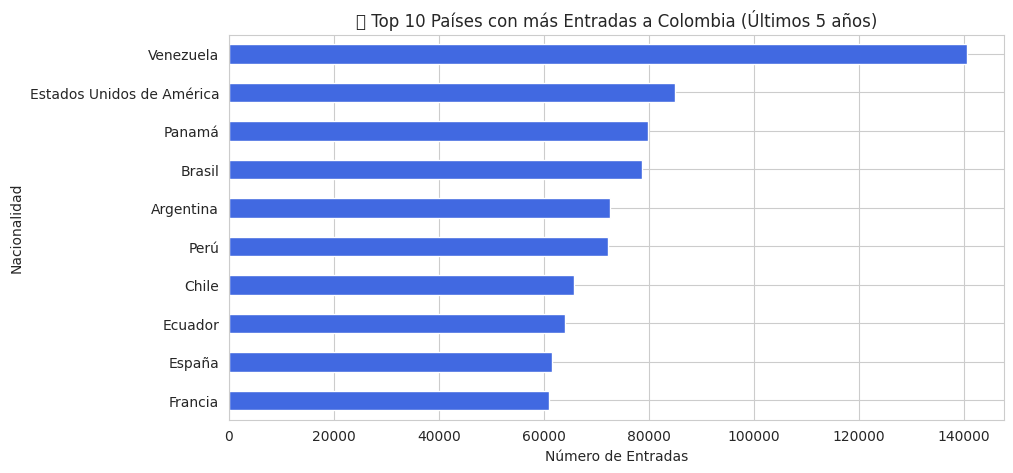

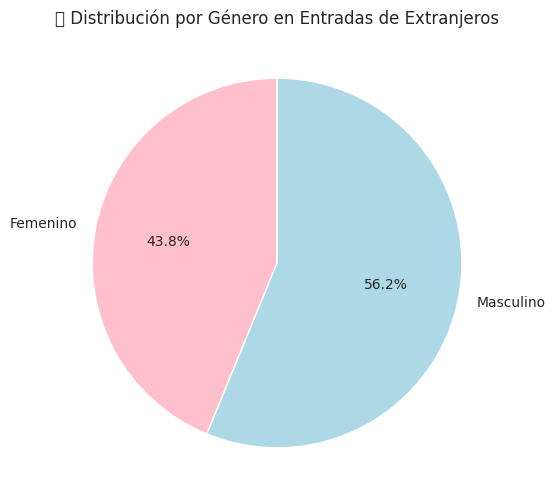

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style("whitegrid")

# Gráfico de barras: Top 10 países con más entradas
plt.figure(figsize=(10, 5))
top_paises.sort_values().plot(kind="barh", color="royalblue")
plt.xlabel("Número de Entradas")
plt.ylabel("Nacionalidad")
plt.title("📌 Top 10 Países con más Entradas a Colombia (Últimos 5 años)")
plt.show()

# Gráfico de pastel: Distribución por género
plt.figure(figsize=(6, 6))
plt.pie(distribucion_genero, labels=["Femenino", "Masculino"], autopct="%1.1f%%", colors=["pink", "lightblue"], startangle=90)
plt.title("📌 Distribución por Género en Entradas de Extranjeros")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


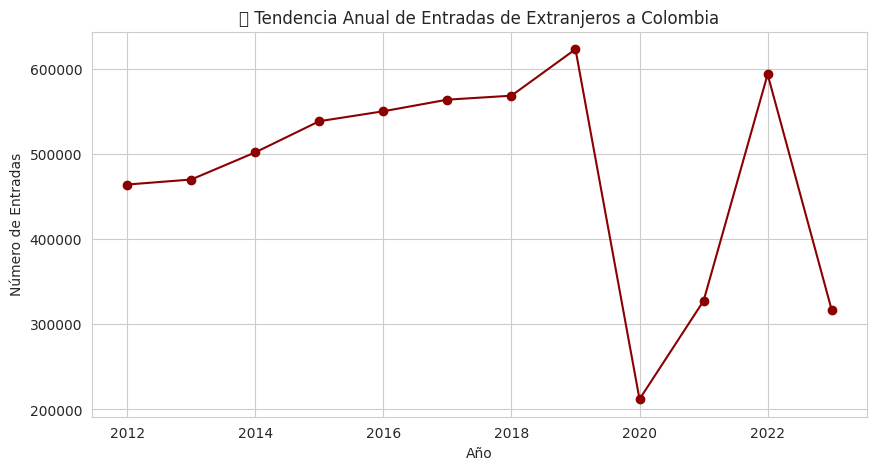

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


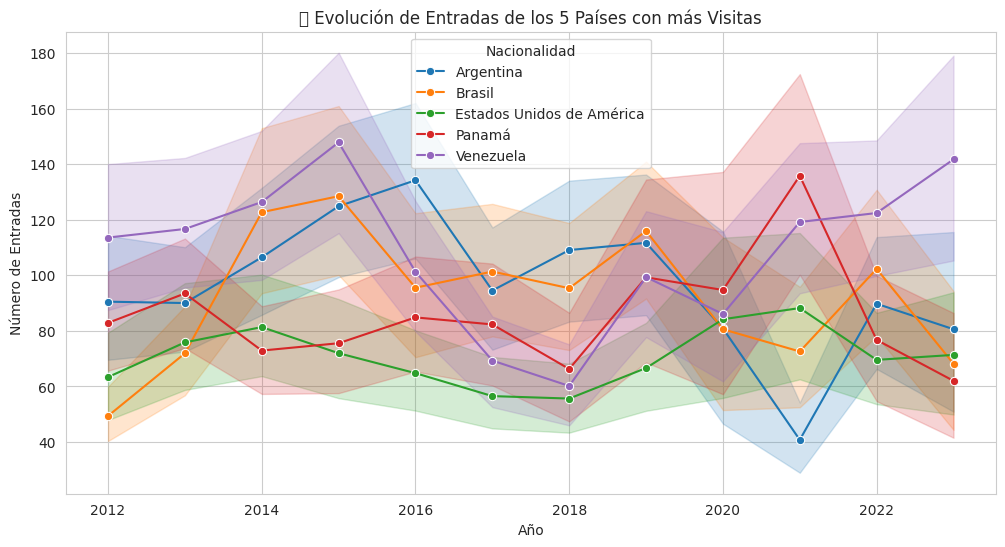

<ipython-input-12-99ab3bb04e81>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Mes", y="Total", palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


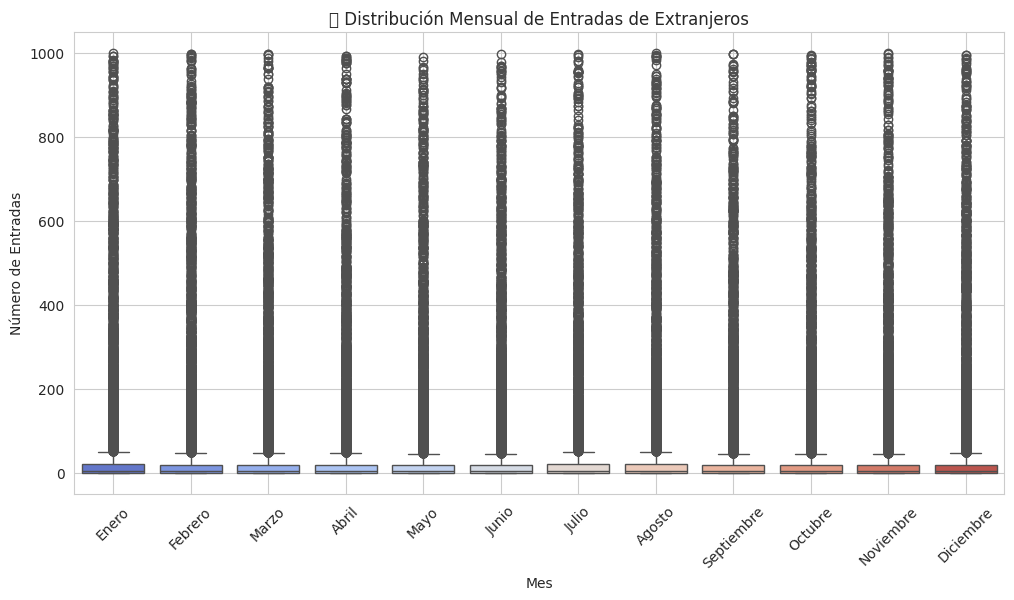

In [12]:
# Gráfico 1: Tendencia anual de entradas
plt.figure(figsize=(10, 5))
df.groupby("Año")["Total"].sum().plot(marker="o", color="darkred", linestyle="-")
plt.xlabel("Año")
plt.ylabel("Número de Entradas")
plt.title("📈 Tendencia Anual de Entradas de Extranjeros a Colombia")
plt.grid(True)
plt.show()

# Seleccionar los 5 países con más ingresos
top_5_paises = top_paises.nlargest(5).index
df_top5 = df[df["Nacionalidad"].isin(top_5_paises)]

# Gráfico 2: Evolución de entradas de los 5 países con más visitas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top5, x="Año", y="Total", hue="Nacionalidad", marker="o", palette="tab10")
plt.xlabel("Año")
plt.ylabel("Número de Entradas")
plt.title("🏆 Evolución de Entradas de los 5 Países con más Visitas")
plt.legend(title="Nacionalidad")
plt.grid(True)
plt.show()

# Gráfico 3: Distribución mensual de entradas
plt.figure(figsize=(12, 6))
orden_meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
df["Mes"] = pd.Categorical(df["Mes"], categories=orden_meses, ordered=True)
sns.boxplot(data=df, x="Mes", y="Total", palette="coolwarm")
plt.xlabel("Mes")
plt.ylabel("Número de Entradas")
plt.title("📊 Distribución Mensual de Entradas de Extranjeros")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


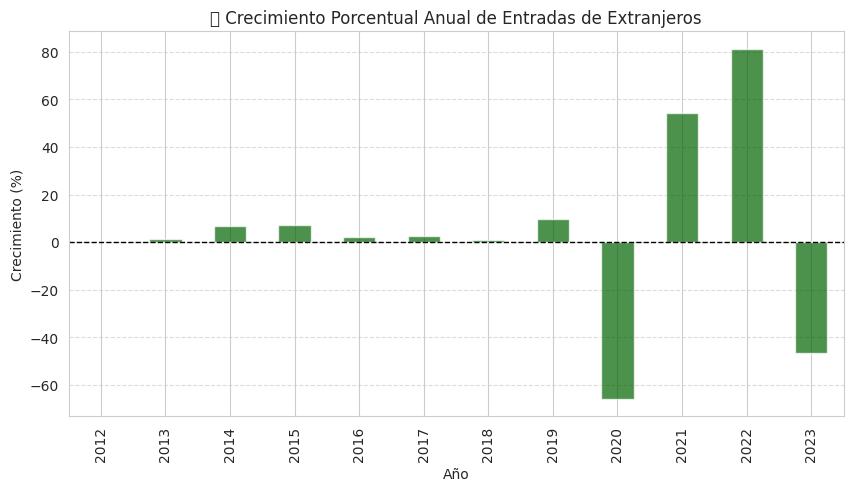

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


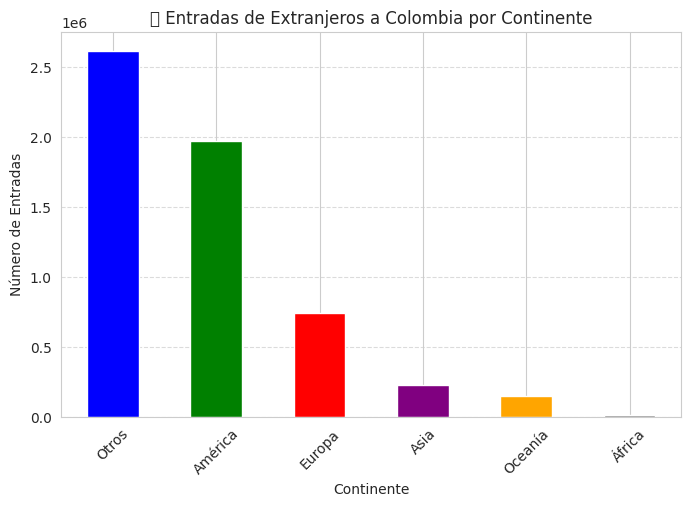

<ipython-input-13-52c6e489741a>:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mensual = df.groupby("Mes")["Total"].mean().reindex(orden_meses)


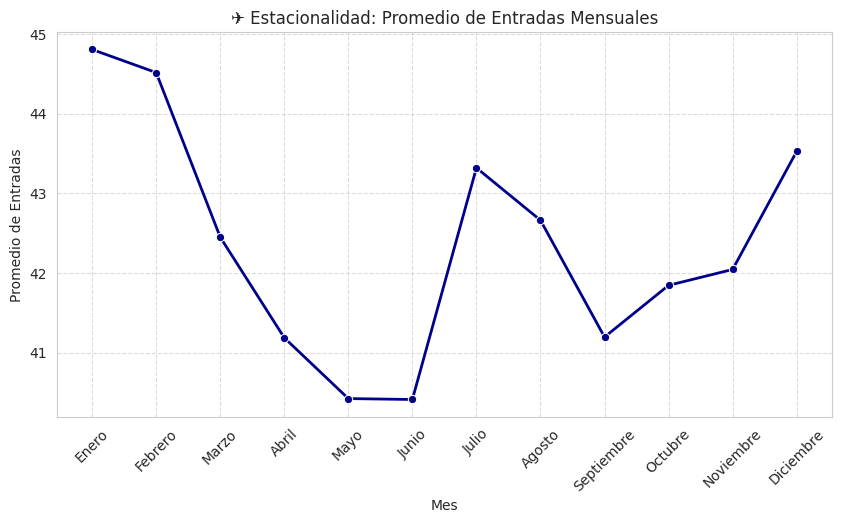

In [13]:
# Gráfico 1: Crecimiento porcentual de entradas año a año
df_anual = df.groupby("Año")["Total"].sum().pct_change() * 100

plt.figure(figsize=(10, 5))
df_anual.plot(kind="bar", color="darkgreen", alpha=0.7)
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.xlabel("Año")
plt.ylabel("Crecimiento (%)")
plt.title("📊 Crecimiento Porcentual Anual de Entradas de Extranjeros")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Gráfico 2: Origen de visitantes por continente
continentes = {
    "América": ["Venezuela", "Estados Unidos", "Panamá", "Brasil", "Argentina", "Perú", "Chile", "Ecuador", "Colombia", "México", "Canadá"],
    "Europa": ["España", "Francia", "Alemania", "Italia", "Reino Unido", "Países Bajos"],
    "Asia": ["China", "India", "Japón", "Corea del Sur"],
    "África": ["Sudáfrica", "Egipto"],
    "Oceanía": ["Australia", "Nueva Zelanda"]
}

# Clasificar países por continente
df["Continente"] = df["Nacionalidad"].map(lambda x: next((c for c in continentes if x in continentes[c]), "Otros"))

# Agrupar por continente
df_continente = df.groupby("Continente")["Total"].sum().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(8, 5))
df_continente.plot(kind="bar", color=["blue", "green", "red", "purple", "orange", "gray"])
plt.xlabel("Continente")
plt.ylabel("Número de Entradas")
plt.title("🌍 Entradas de Extranjeros a Colombia por Continente")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Gráfico 3: Estacionalidad (Promedio mensual)
df_mensual = df.groupby("Mes")["Total"].mean().reindex(orden_meses)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_mensual, marker="o", color="darkblue", linewidth=2)
plt.xlabel("Mes")
plt.ylabel("Promedio de Entradas")
plt.title("✈️ Estacionalidad: Promedio de Entradas Mensuales")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#🌎 Mapa de Calor: Entradas de Extranjeros a Colombia
Este mapa visualiza los puntos de ingreso más frecuentes de extranjeros a Colombia. 🔥 Cuanto más intenso el color, mayor es la concentración de llegadas en esa ubicación.

In [15]:
import folium
from folium.plugins import HeatMap


In [17]:
import re

# Asegurar que la columna de coordenadas existe
if "Latitud - Longitud" in df.columns:
    # Extraer latitud y longitud usando expresiones regulares
    coordenadas = df["Latitud - Longitud"].str.extract(r"\(([-\d.]+),\s*([-\d.]+)\)")
    df["Latitud"] = coordenadas[0].astype(float)
    df["Longitud"] = coordenadas[1].astype(float)

    # Verificar si se extrajeron correctamente
    print(df[["Latitud", "Longitud"]].head())
else:
    print("⚠️ La columna 'Latitud - Longitud' no se encuentra en el DataFrame.")


    Latitud   Longitud
0  4.697144 -74.140516
1  4.697144 -74.140516
2 -4.197703 -69.941278
3  0.251290 -76.875963
4  0.814836 -77.662532


In [18]:
# Crear un mapa centrado en Colombia
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Filtrar solo las filas con coordenadas válidas
df_mapa = df.dropna(subset=["Latitud", "Longitud"])

# Agregar puntos de calor
heat_data = list(zip(df_mapa["Latitud"], df_mapa["Longitud"], df_mapa["Total"]))
HeatMap(heat_data, radius=10, blur=5).add_to(mapa)

# Mostrar mapa
mapa



#📈🔮Predicción

Paso 1: Importar librerías necesarias

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm



Paso 2: Preparar los datos

In [22]:
# Agrupar los datos por año y sumar el total de entradas
df_pred = df.groupby("Año")["Total"].sum()

# Asegurar que el índice (Año) es entero
df_pred.index = df_pred.index.astype(int)


Paso 3: Entrenar el modelo ARIMA

In [23]:
# Crear modelo ARIMA (p=1, d=1, q=1 como punto de partida)
modelo = ARIMA(df_pred, order=(1,1,1))
modelo_entrenado = modelo.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Paso 4: Hacer predicciones

In [24]:
# Predecir los próximos 5 años
steps = 5
predicciones = modelo_entrenado.forecast(steps=steps)
pred_years = list(range(df_pred.index[-1] + 1, df_pred.index[-1] + steps + 1))

# Convertir predicciones a un array NumPy
predicciones_np = np.array(predicciones)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Paso 5: Graficar los resultados

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


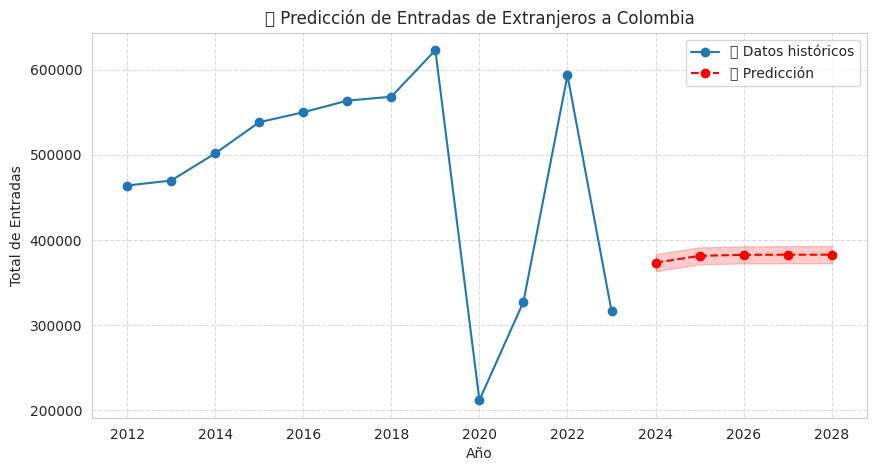

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(df_pred.index, df_pred.values, label="📊 Datos históricos", marker="o")
plt.plot(pred_years, predicciones_np, label="🔮 Predicción", linestyle="dashed", marker="o", color="red")
plt.fill_between(pred_years, predicciones_np - 10000, predicciones_np + 10000, color="red", alpha=0.2)
plt.xlabel("Año")
plt.ylabel("Total de Entradas")
plt.title("🔮 Predicción de Entradas de Extranjeros a Colombia")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()
